Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Nicolás Guarín-Zapata 2022.

# Optimización de cerchas planas

Como función objetivo deseamos maximizar la rigidez de la estructura.
Esto es equivalente a minimizar su flexibilidad, que puede escribirse como

$$C = \mathbf{f}^T \mathbf{u}\,,$$

en donde $\mathbf{f}$ es e vector de cargas y $\mathbf{u}$ el vector de
desplazamientos. En inglés al término flexibilidad se le conoce como
_flexibility_ o _compliance_. Por tanto, si tenemos una estructura hecha
de barras con secciones transversales $A_i$, el problema de optimización
serı́a

$$\min_{A_i}  \mathbf{f}^T \mathbf{u} .$$

El equilibro de la estructura es una condición que siempre debe cumplirse,
y está dada por

$$\mathbf{K} \mathbf{u} = \mathbf{f}\, ,$$

y, en nuestro caso, ``SolidsPy`` se encarga de encontrar el vector de
desplazamientos a partir de un vector de cargas dado.

Adicionalmente, tenemos condiciones de peso máximo sobre la cercha, que
están dadas por

$$w_{\max} = \rho\sum_{i=0}^{N} L_i A_i\, ,$$

en donde $L_i$ es la longitud de la $i$-ésima barra.

## Problema de optimización

El problema de optimización que nos interesa es el de minimizar la flexibilidad
(maximizar la rigidez) de una estructura, con un peso máximo $w_{\max}$ dado y
que satisfaga equilibrio. Matemáticamente podemos escribir este problema como

\begin{equation*}
\begin{aligned}
& \underset{A_i}{\text{minimizar}}
& & \mathbf{f}^T \mathbf{u} \\
& \text{sujeto a}
& & w_{\max} - \rho \sum_{i=0}^N L_i A_i  \geq 0\, ,\\
& & & A_i - A_{\min} > 0\quad \forall i ,\\
& & & A_{\max} - A_i > 0\quad \forall i ,\\
& & & \mathbf{K} \mathbf{u} = \mathbf{f}\, .
\end{aligned}
\end{equation*}

Pero la última condición se satisface de manera trivial si $\mathbf{u}$ es
solución de

$$\mathbf{K} \mathbf{u} = \mathbf{f}\, ,$$

que en nuestro caso se cumple. Por tanto, tenemos el siguiente problema

\begin{equation*}
\begin{aligned}
& \underset{A_i}{\text{minimizar}}
& & \mathbf{f}^T \mathbf{u} \\
& \text{sujeto a}
& & w_{\max} - \rho \sum_{i=0}^N L_i A_i  \geq 0\, ,\\
& & & A_i - A_{\min} > 0\quad \forall i ,\\
& & & A_{\max} - A_i > 0\quad \forall i\,  .
\end{aligned}
\end{equation*}

## Solución del problema

### Importación de bibliotecas

In [ ]:
import piplite
await piplite.install("solidspy")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import solidspy.postprocesor as pos

También necesitamos importar algunas funciones del módulo
truss_opt

In [3]:
from truss_opt import weight, compliance, fem_sol, plot_truss

### Diseño original

Queremos optimizar el grosor de las barras de la siguiente cercha.


<img src="img/cercha_techo.svg"/>

In [4]:
nodes = np.array([
           [ 0,  0.0,  0.0, -1, -1],
           [ 1,  2.0,  0.0,  0,  0],
           [ 2,  4.0,  0.0,  0,  0],
           [ 3,  6.0,  0.0,  0,  0],
           [ 4,  8.0,  0.0,  0,  0],
           [ 5, 10.0,  0.0,  0,  0],
           [ 6, 12.0,  0.0,  0, -1],
           [ 7,  2.0,  1.0,  0,  0],
           [ 8, 10.0,  1.0,  0,  0],
           [ 9,  4.0,  2.0,  0,  0],
           [10,  8.0,  2.0,  0,  0],
           [11,  6.0,  3.0,  0,  0]])
mats = np.column_stack((np.full(21, 1e6),
                        np.full(21, 1e-2)))
eles = np.array([
           [ 0,  6,  0,  0,  1],
           [ 1,  6,  1,  1,  7],
           [ 2,  6,  2,  7,  0],
           [ 3,  6,  3,  1,  2],
           [ 4,  6,  4,  2,  7],
           [ 5,  6,  5,  2,  3],
           [ 6,  6,  6,  3,  9],
           [ 7,  6,  7,  9,  2],
           [ 8,  6,  8,  3,  4],
           [ 9,  6,  9,  4, 10],
           [10,  6, 10, 10,  3],
           [11,  6, 11,  3, 11],
           [12,  6, 12,  4,  5],
           [13,  6, 13,  5,  8],
           [14,  6, 14,  8,  4],
           [15,  6, 15,  8, 10],
           [16,  6, 16,  5,  6],
           [17,  6, 17,  6,  8],
           [18,  6, 18, 10, 11],
           [19,  6, 19, 11,  9],
           [20,  6, 20,  9,  7]])
loads = np.array([
           [ 0,  0.0, -2.0],
           [ 6,  0.0, -2.0],
           [ 7,  0.0, -2.0],
           [ 8,  0.0, -2.0],
           [ 9,  0.0, -2.0],
           [10,  0.0, -2.0],
           [11,  0.0, -2.0]])

areas = mats[:, 1].copy()

### Resultados para el diseño original

In [5]:
disp0 = fem_sol(nodes, eles, mats, loads)
weight0 = weight(areas, nodes, eles)
stress0 = pos.stress_truss(nodes, eles, mats, disp0)
compliance0 = compliance(areas, nodes, eles, loads, mats)
print("Diseño original: {}".format(areas))
print("Peso: {:g}".format(weight0))
print("Esfuerzos: {}".format(np.round(stress0)))
print("Flexibilidad: {:g}".format(compliance0))

Diseño original: [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
Peso: 0.445454
Esfuerzos: [ 1000.     0. -1118.  1000.  -224.   800.  -283.   100.   800.   100.
  -283.   400.  1000.     0.  -224.  -894.  1000. -1118.  -671.  -671.
  -894.]
Flexibilidad: 0.229365


### Optimización

In [6]:
nels = len(areas)

# Peso máximo permitido
tot_w = 0.5 

# Cotas inferior y superior en las áreas
bnds = [(1e-3, 0.1) for cont in range(nels)]

# Restricción de peso
weight_fun = lambda areas, nodes, elements, tot_w:\
        tot_w - weight(areas, nodes, elements)
weight_cons = [{'type': 'ineq', 'fun': weight_fun,
    'args': (nodes, eles, tot_w)}]
cons = weight_cons

# Minimización
res = minimize(compliance, x0=areas, args=(nodes, eles, loads, mats),
               bounds=bnds, constraints=cons, method="SLSQP",
               tol=1e-6, options={"maxiter": 500, "disp":True})


c:\Users\nguarinz\Anaconda3\envs\truss_opt\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.15079235942430463
            Iterations: 20
            Function evaluations: 467
            Gradient evaluations: 20


### Diseño optimizado

In [7]:
# Optimized design
mats1 = mats.copy()
mats1[:, 1] = res.x
disp1 = fem_sol(nodes, eles, mats1, loads)
weight1 = weight(res.x, nodes, eles)
stress1 = pos.stress_truss(nodes, eles, mats1, disp1)
compliance1 = compliance(res.x, nodes, eles, loads, mats1)
print("Diseño optimizado: {}".format(np.round(res.x, 4)))
print("Peso: {:g}".format(weight1))
print("Esfuerzos: {}".format(np.round(stress1)))
print("Flexiblidad: {:g}".format(compliance1))

Diseño optimizado: [0.018  0.001  0.0207 0.018  0.004  0.0145 0.0051 0.0018 0.0144 0.0018
 0.0051 0.0074 0.0179 0.001  0.004  0.0167 0.018  0.0208 0.012  0.0122
 0.0163]
Peso: 0.5
Esfuerzos: [ 557.    0. -539.  557. -561.  552. -557.  553.  555.  560. -554.  541.
  560.    0. -565. -537.  556. -538. -560. -550. -547.]
Flexiblidad: 0.150792


### Visualización

La función `plot_truss()` nos permite visualizar la cercha
con los esfuerzos que experimenta. El color rojo representa
una barra a tracción y el color azul una a compresión. La
intensidad del color representa la magnitud del esfuerzo.

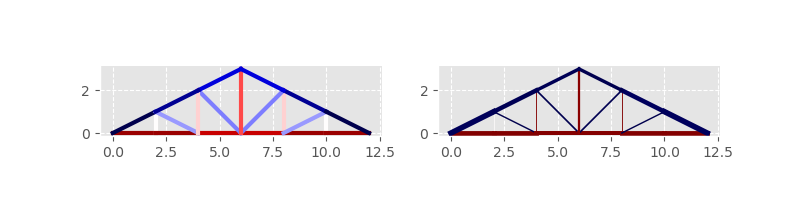

In [8]:
plt.figure("Comparación", figsize=(8, 2))
plt.subplot(121)
plot_truss(nodes, eles, mats, loads)
plt.subplot(122)
plot_truss(nodes, eles, mats1, loads)
plt.show()